In [1]:
%matplotlib inline

In [7]:
from astropy.table import Table

from rescale_dc2.load_umachine_mocks import list_available_bpl_fnames
bpl_halos = Table.read(list_available_bpl_fnames()[-1], path='data')

from rescale_dc2.load_umachine_mocks import list_available_umachine_fnames
umachine = Table.read(list_available_umachine_fnames()[-1], path='data')

from rescale_dc2.load_halos import list_available_protoDC2_fof_fnames
from rescale_dc2.load_halos import load_protoDC2_fof_halos
pdc2_halos = load_protoDC2_fof_halos(list_available_protoDC2_fof_fnames()[-1])

In [8]:
from rescale_dc2.nearest_umachine_halo_selection import source_halo_selection_indices

halo_selection_indices = source_halo_selection_indices(
        bpl_halos['log10_cumulative_nd_mvir'],
        pdc2_halos['log10_cumulative_nd_mvir'])

from rescale_dc2.nearest_umachine_halo_selection import value_add_matched_target_halos

pdc2_halos = value_add_matched_target_halos(bpl_halos, pdc2_halos, halo_selection_indices)

In [4]:
from rescale_dc2.nearest_umachine_halo_selection import source_galaxy_selection_indices

galaxy_selection_indices = source_galaxy_selection_indices(
    pdc2_halos, halo_selection_indices)

from rescale_dc2.nearest_umachine_halo_selection import create_galsampled_dc2

dc2 = create_galsampled_dc2(umachine, pdc2_halos,
        halo_selection_indices, galaxy_selection_indices)


In [51]:
print(umachine.keys())

['id', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'obs_sm', 'obs_sfr', 'mpeak', 'mvir', 'vmax', 'vmax_at_mpeak', 'upid', 'hostid', 'has_matching_host', 'host_halo_x', 'host_halo_y', 'host_halo_z', 'host_halo_vx', 'host_halo_vy', 'host_halo_vz', 'host_halo_mvir', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_ssfr', 'sfr_percentile_fixed_sm']


In [16]:
um_mask = umachine['obs_sm'] > 10**10.5
dc2_mask = dc2['obs_sm'] > 10**10.5

from halotools.mock_observables import return_xyz_formatted_array, tpcf

rbins = np.logspace(-1, 1.35, 25)
rmids = 10**(0.5*(np.log10(rbins[:-1]) + np.log10(rbins[1:])))

pos_um = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], period=250, 
                                   mask = um_mask)
pos_dc2 = return_xyz_formatted_array(dc2['x'], dc2['y'], dc2['z'], period=256, 
                                    mask = dc2_mask)

xi_um = tpcf(pos_um, rbins, period=250)
xi_dc2 = tpcf(pos_dc2, rbins, period=250)

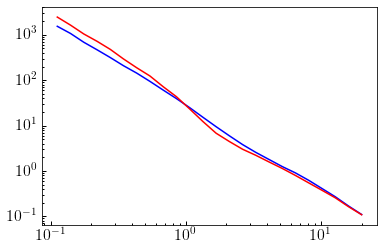

In [17]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rmids, xi_um, color='blue')
__=ax.plot(rmids, xi_dc2, color='red')


In [18]:
xi_dc2/xi_um

array([ 1.59668592,  1.52592135,  1.52188171,  1.5370585 ,  1.51424291,
        1.41015245,  1.31224016,  1.31431838,  1.18707072,  1.10088514,
        0.93772397,  0.80652221,  0.71816057,  0.7478215 ,  0.7886847 ,
        0.8626126 ,  0.88212812,  0.90956802,  0.87905395,  0.87766809,
        0.9141577 ,  0.94735838,  0.96497095,  0.98690302])

In [37]:
from halotools.mock_observables import hod_from_mock

haloprop_bins = np.logspace(10, 14.75, 40)
haloprop_mids = 0.5*(haloprop_bins[:-1] + haloprop_bins[1:])
mask = umachine['obs_sm'] > 10**10.5
haloprop_galaxies = umachine['host_halo_mvir']
haloprop_halos = bpl_halos['mvir']

mean_ngal, __ = hod_from_mock(haloprop_galaxies[mask], haloprop_halos, haloprop_bins)

cenmask = mask * (umachine['upid'] == -1)
mean_ncen, __ = hod_from_mock(haloprop_galaxies[cenmask], haloprop_halos, haloprop_bins)

satmask = mask * (umachine['upid'] != -1)
mean_nsat, __ = hod_from_mock(haloprop_galaxies[satmask], haloprop_halos, haloprop_bins)


In [46]:
print(umachine.keys())

['id', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'obs_sm', 'obs_sfr', 'mpeak', 'mvir', 'vmax', 'vmax_at_mpeak', 'upid', 'hostid', 'has_matching_host', 'host_halo_x', 'host_halo_y', 'host_halo_z', 'host_halo_vx', 'host_halo_vy', 'host_halo_vz', 'host_halo_mvir', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_ssfr', 'sfr_percentile_fixed_sm']


In [44]:
mask = dc2['obs_sm'] > 10**10.5
haloprop_galaxies = dc2['host_halo_mvir']
haloprop_halos = pdc2_halos['matching_mvir']

mean_ngal_dc2, __ = hod_from_mock(haloprop_galaxies[mask], haloprop_halos, haloprop_bins)

cenmask = mask * (dc2['upid'] == -1)
mean_ncen_dc2, __ = hod_from_mock(haloprop_galaxies[cenmask], haloprop_halos, haloprop_bins)

satmask = mask * (dc2['upid'] != -1)
mean_nsat_dc2, __ = hod_from_mock(haloprop_galaxies[satmask], haloprop_halos, haloprop_bins)



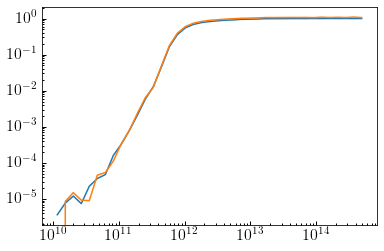

In [47]:
fig, ax = plt.subplots(1, 1)

# __=ax.loglog(haloprop_mids, mean_ngal)
# __=ax.loglog(haloprop_mids, mean_ngal_dc2, '--')
# __=ax.loglog(haloprop_mids, mean_nsat)
# __=ax.loglog(haloprop_mids, mean_nsat_dc2)
# __=ax.loglog(haloprop_mids, mean_ncen)
# __=ax.loglog(haloprop_mids, mean_ncen_dc2)



In [49]:
from rescale_dc2.load_catalogs import load_dc2_sdss
sdss = load_dc2_sdss()

In [50]:
print(sdss.keys())

['ra', 'dec', 'z', 'sm', 'sfr', 'sm_complete', 'd4000', 'has_match', 'dr7_objID', 'ssfr', 'lum_dist', 'extinction_u', 'extinction_g', 'extinction_r', 'extinction_i', 'extinction_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'kcorr', 'bulge_to_total_rband', 'r50_magr_kpc', 'r50_magr_disk_kpc', 'r50_magr_bulge_kpc', 'AbsMagu', 'AbsMagg', 'AbsMagr', 'AbsMagi', 'AbsMagz', 'percentile', 'ssfr_percentile_at_fixed_sm']
